In [2]:
import numpy as np 
import pandas as pd 
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import io

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
df = pd.read_csv('paths_and_labels.csv')

In [4]:
df.head()

,img_path,class
0,mdb003.pgm.png,dense
1,mdb004.pgm.png,dense
2,mdb033.pgm.png,dense
3,mdb034.pgm.png,dense
4,mdb035.pgm.png,dense


In [5]:
df.img_path[0]

'mdb003.pgm.png'

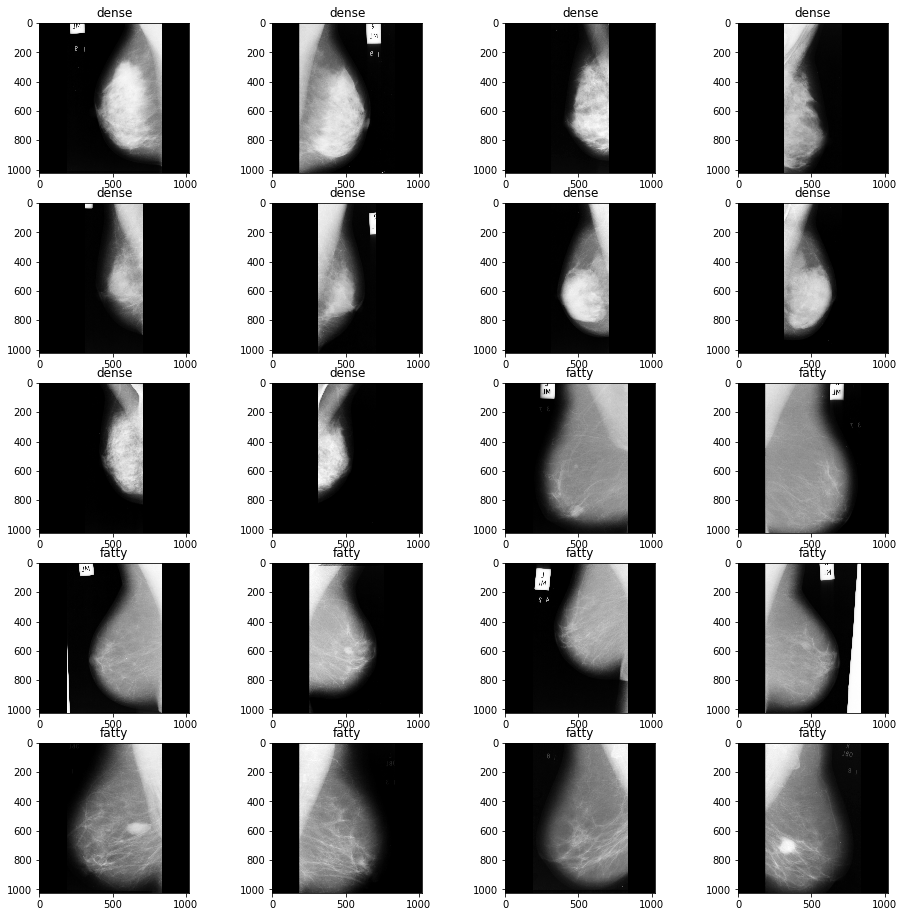

In [6]:
fig, m_axs = plt.subplots(5,4, figsize = (16, 16))
m_axs = m_axs.flatten()
imgs = df.img_path
ind=0

for img, ax in zip(imgs, m_axs):
    img = io.imread(img)
    ax.imshow(img,cmap='gray')
    ax.set_title(df.iloc[ind]['class'])
    ind=ind+1

In [14]:
## resize your images 
IMG_SIZE = (224, 224)

#### Try different values for the parameters
* horizontal_flip and vertical_flip should be set to True/False
* height_shift_range and width_shift_range should be between 0 and 1
* rotation_range can be between 0 and 180
* shear_range can be between 0 and 1
* zoom_range can be between 0 and 1

In [15]:
idg = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1)

gen = idg.flow_from_dataframe(dataframe=df, 
                                         directory=None, 
                                         x_col = 'img_path',
                                         y_col = 'class',
                                         class_mode = 'binary',
                                         target_size = IMG_SIZE, 
                                         batch_size = 9
                                         )

Found 20 validated image filenames belonging to 2 classes.


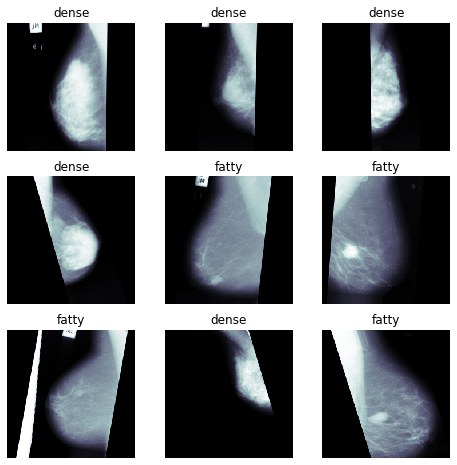

In [16]:
## check examples of our augmented training data. 

t_x, t_y = next(gen)
fig, m_axs = plt.subplots(3, 3, figsize = (8, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    if c_y == 1: 
        c_ax.set_title('fatty')
    else:
        c_ax.set_title('dense')
    c_ax.axis('off')

### choose different parameters

In [17]:
idg = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True, 
                              vertical_flip = True, ## now i'm adding vertical flip
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=45, ## I'm also increasing the rotation_range
                              shear_range = 0.1,
                              zoom_range=0.1)

gen = idg.flow_from_dataframe(dataframe=df, 
                                         directory=None, 
                                         x_col = 'img_path',
                                         y_col = 'class',
                                         class_mode = 'binary',
                                         target_size = IMG_SIZE, 
                                         batch_size = 9
                                         )

Found 20 validated image filenames belonging to 2 classes.


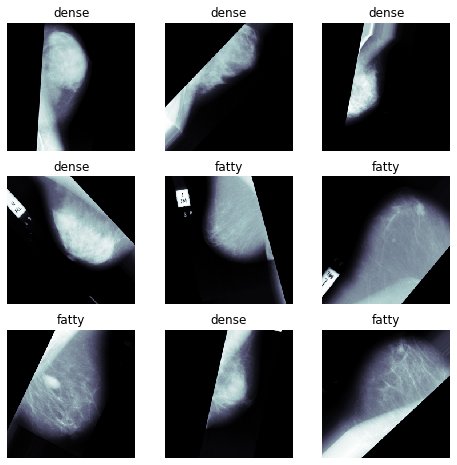

In [18]:
### more

t_x, t_y = next(gen)
fig, m_axs = plt.subplots(3, 3, figsize = (8, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    if c_y == 1: 
        c_ax.set_title('fatty')
    else:
        c_ax.set_title('dense')
    c_ax.axis('off')

Not reasonable. Tupside-down images

In [12]:
idg = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20,
                              shear_range = 0.1,
                              zoom_range=0.5) ## Here I'm adding a lot more zoom 

gen = idg.flow_from_dataframe(dataframe=df, 
                                         directory=None, 
                                         x_col = 'img_path',
                                         y_col = 'class',
                                         class_mode = 'binary',
                                         target_size = IMG_SIZE, 
                                         batch_size = 9
                                         )

Found 20 validated image filenames belonging to 2 classes.


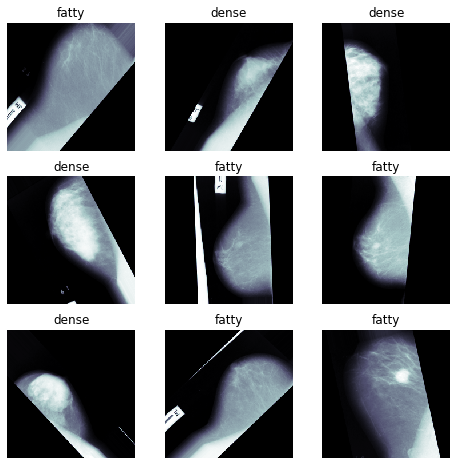

In [19]:
## more
t_x, t_y = next(gen)
fig, m_axs = plt.subplots(3, 3, figsize = (8, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    if c_y == 1: 
        c_ax.set_title('fatty')
    else:
        c_ax.set_title('dense')
    c_ax.axis('off')

Not too bad!